In [446]:
# importar bibliotécas de trabajo

from time import time
inicio = time()
import pandas as pd

In [447]:
# leer archivos de datos

goog = getDataByOneCollection("tfmTelefonica", "Google")

fb = getDataByOneCollection("tfmTelefonica", "Facebook")

amzn = getDataByOneCollection("tfmTelefonica", "Amazon")

msft = getDataByOneCollection("tfmTelefonica", "Microsoft")

btc_usd = getDataByOneCollection("tfmTelefonica", "Bitcoin_USD")

#dias = pd.read_excel("D:\\datos\\Entrenamiento\\IntitutoTecnologicoTelefonica\\ProgramaSuperiorBigData\\Modulo_10_Proyecto\\DIAS.xlsx")



In [435]:
goog.head()

,Company,Date,Open,High,Low,Close,Adj Close,Volume
0,Google,2021-03-12,2085.00,2090.26,2047.55,2061.92,2061.92,1725000
1,Google,2021-03-11,2074.06,2125.70,2072.38,2114.77,2114.77,1238300
2,Google,2021-03-10,2071.76,2075.00,2033.37,2055.03,2055.03,1267800
3,Google,2021-03-09,2070.00,2078.04,2047.83,2052.70,2052.70,1696400
4,Google,2021-03-08,2101.13,2128.81,2021.61,2024.17,2024.17,1646000


In [397]:
amzn.dtypes

Company      object
Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

In [436]:
msft.head()

,Company,Date,Open,High,Low,Close,Adj Close,Volume
0,Microsoft,2021-03-12,234.01,235.82,233.23,235.75,235.75,22647900
1,Microsoft,2021-03-11,234.96,239.17,234.31,237.13,237.13,29896000
2,Microsoft,2021-03-10,237.00,237.00,232.04,232.42,232.42,29733000
3,Microsoft,2021-03-09,232.88,235.38,231.67,233.78,233.78,33034000
4,Microsoft,2021-03-08,231.37,233.37,227.13,227.39,227.39,35245900


In [399]:
fb.head()

,Company,Date,Open,High,Low,Close,Adj Close,Volume
0,Facebook,2021-03-12,269.14,269.74,264.02,268.40,268.40,20590000
1,Facebook,2021-03-11,268.11,277.90,267.82,273.88,273.88,21816600
2,Facebook,2021-03-10,268.64,268.97,262.87,264.90,264.90,14197500
3,Facebook,2021-03-09,261.18,268.53,259.81,265.74,265.74,22018400
4,Facebook,2021-03-08,265.55,265.58,255.05,255.31,255.31,18372700


In [7]:
btc_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [400]:
#btc_usd['Date'] = pd.to_datetime(btc_usd['Date'], format ='%Y-%m-%d')

In [437]:
# Selección de los datos de interés


goog_cierre = goog[["Date","Close"]]
goog_cierre['Close'].astype('float64') 

fb_cierre = fb[["Date","Close"]]
fb_cierre['Close'].astype('float64') 


amzn_cierre = amzn[["Date","Close"]]
amzn_cierre['Close'].astype('float64') 


msft_cierre = msft[["Date","Close"]]
msft_cierre['Close'].astype('float64') 


btc_usd_cierre = btc_usd[["Date","Close"]]
btc_usd_cierre['Close'].astype('float64') 

btc_usd_cierre.dtypes



Date     object
Close    object
dtype: object

In [425]:
# Renombrar columna de cierre de cada DataFrame, para que no se confundan al hacer el merge

goog_cierre = goog_cierre.rename(columns = {"Close" : "CloseGoog"})
fb_cierre = fb_cierre.rename(columns = {"Close" : "CloseFb"})
amzn_cierre = amzn_cierre.rename(columns = {"Close" : "CloseAmzn"})
msft_cierre = msft_cierre.rename(columns = {"Close" : "CloseMsft"})
btc_usd_cierre = btc_usd_cierre.rename(columns = {"Close" : "ClosBtcEur"})

# Establecer el índice en la columna Date para cada archivo

goog_cierre.set_index('Date', inplace = True)

fb_cierre.set_index('Date', inplace = True)

amzn_cierre.set_index('Date', inplace = True)

msft_cierre.set_index('Date', inplace = True)

btc_usd_cierre.set_index('Date', inplace = True)



In [426]:
goog_cierre.dtypes

CloseGoog    object
dtype: object

In [392]:
fb_cierre.dtypes

CloseFb    object
dtype: object

In [356]:
amzn_cierre.dtypes

CloseAmzn    object
dtype: object

In [355]:
msft_cierre.dtypes

CloseMsft    object
dtype: object

In [404]:
goog_cierre.dtypes

CloseGoog    object
dtype: object

In [427]:
# Integración de todos los dataframe en uno solo dataframe

df_combinado = btc_usd_cierre.join(goog_cierre).join(amzn_cierre).join(fb_cierre).join(msft_cierre)
df_combinado


,ClosBtcEur,CloseGoog,CloseAmzn,CloseFb,CloseMsft
Date,,,,,
2021-03-14,60044.67,NaN,NaN,NaN,NaN
2021-03-13,61243.09,NaN,NaN,NaN,NaN
2021-03-12,57332.09,2061.92,3089.49,268.40,235.75
2021-03-11,57805.12,2114.77,3113.59,273.88,237.13
2021-03-10,56008.55,2055.03,3057.64,264.90,232.42
...,...,...,...,...,...
2020-12-09,18553.92,1784.13,3104.20,277.92,211.80
2020-12-08,18321.14,1818.55,3177.29,283.40,216.01
2020-12-07,19191.63,1819.48,3158.00,285.58,214.29


In [428]:
df_combinado.describe().transpose()

,count,unique,top,freq
ClosBtcEur,100,100,47093.85,1
CloseGoog,66,66,2081.51,1
CloseAmzn,66,66,3322.00,1
CloseFb,66,65,271.87,2
CloseMsft,66,66,231.60,1


# Comentario respecto al resumen descriptivo

Se observa como en los precios de cierre de las empresas el número de registros válidoses de 1587 casos esto es 329 casos perdidos respecto al precio de cierre del Bitcoin (2304), estos valores perdidos se corresponden a los días en que no hay actividad en las bolsas de valores, por lo que se sustituiran los mismos por el valor de cierre del último día hábil antes del valor perdido.

La sustitución de los valores perdidos se hace en el siguiente código

In [442]:
# Dado que los valores perdidos que hay en data set se corresponden con días donde no hay cotización de las acciones 
# En la bolsa de valores, estos serán sustitudios por el último valor válido, para ello usaremos el método de pandas ffill()
# que propaga el último valor valido hacia adelante, así si el último valor valido fue de un viernes, ese valor se asignará
# al sábado y al domingo
df_combinado = df_combinado.ffill().iloc[:-1]
df_combinado = df_combinado[3:]
#df_combinado.head(50)
#df_combinado.tail(50)           

In [430]:
df_combinado.describe().transpose()



,count,unique,top,freq
ClosBtcEur,96,96,47093.85,1
CloseGoog,96,65,1728.24,4
CloseAmzn,96,65,3120.76,4
CloseFb,96,64,277.00,4
CloseMsft,96,65,224.96,4


El resultado anterio, muestra que los valores perdidos fueron reemplazados, respecto a los valores de los estadísticos descriptivos, los mismos no presentaron modificaciones significativas

In [309]:
# df_combinado.loc[['ClosBtcEur', 'CloseGoog', 'CloseAmzn', 'CloseFb', 'CloseMsft']].boxplot()

In [431]:
df_combinado.loc[:, ['ClosBtcEur', 'CloseGoog', 'CloseAmzn', 'CloseFb', 'CloseMsft']].plot()

TypeError: no numeric data to plot

# Comentario respecto al gráfico de cajas

Se observa la diferencia en la variabilidad de los precios de cierre de goole respecto a los precios de cierre de las empresas tecnológicas,en particular los precios de cierre de google presentan una distribución de cola larga

In [410]:
import matplotlib.pyplot as plt
%matplotlib inline



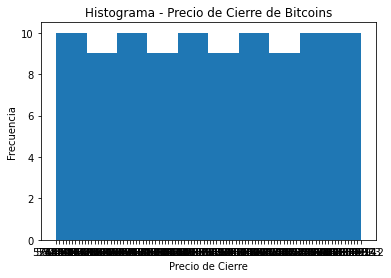

In [411]:
plt.hist(x=df_combinado.iloc[:,0])
plt.title('Histograma - Precio de Cierre de Bitcoins')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

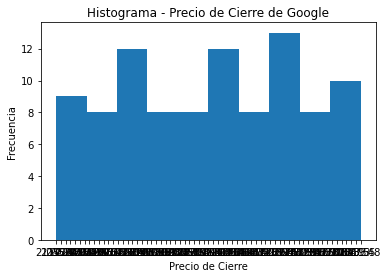

In [412]:
plt.hist(x=df_combinado.iloc[:,1])
plt.title('Histograma - Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

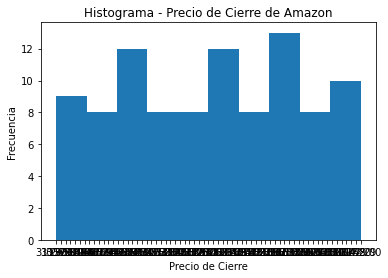

In [413]:
plt.hist(x=df_combinado.iloc[:,2])
plt.title('Histograma - Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

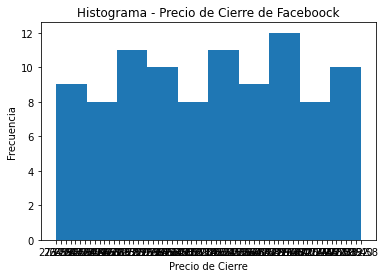

In [414]:
plt.hist(x=df_combinado.iloc[:,3])
plt.title('Histograma - Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

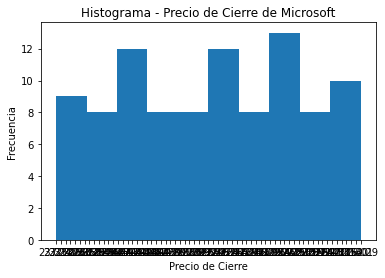

In [415]:
plt.hist(x=df_combinado.iloc[:,4])
plt.title('Histograma - Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

En todos los gáficos se evidencia lo asimétrico de los datos. Lo anterior sugiere que es combeniente realizar algún tipo de transformación en los datos.

Para ello usamos la transformación logaritmica 

In [438]:
import numpy as np

In [439]:
plt.hist(x=np.log(df_combinado.iloc[:,0]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Bitcoins')
plt.xlabel('Logaritmo Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [419]:
plt.hist(x=np.log(df_combinado.iloc[:,2]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Amazon')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [420]:
plt.hist(x=np.log(df_combinado.iloc[:,1]))
plt.title('Histograma - Logartimo del Precio de Cierre de Google')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [440]:
plt.hist(x=np.log(df_combinado.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

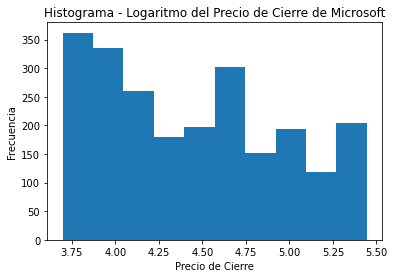

In [33]:
plt.hist(x=np.log(df_combinado.iloc[:,4]))
plt.title('Histograma - Logaritmo del Precio de Cierre de Microsoft')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

In [445]:
plt.hist(x=np.log(df_combinado.iloc[:,3]))
plt.title('Histograma - Logartimo del Precio de Cierre de Faceboock')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [444]:
df_combinado_log = np.log(df_combinado)

df_combinado_log.loc[:, ['ClosBtcEur', 'CloseGoog', 'CloseAmzn', 'CloseFb', 'CloseMsft']].boxplot()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [441]:
df_combinado_log.loc[:, ['ClosBtcEur', 'CloseGoog', 'CloseAmzn', 'CloseFb', 'CloseMsft']].plot()

NameError: name 'df_combinado_log' is not defined

In [37]:
df_combinado_log.head()  

,ClosBtcEur,CloseGoog,CloseAmzn,CloseFb,CloseMsft
Date,,,,,
2014-09-17,6.125414,6.368477,5.780744,4.336375,3.839882
2014-09-18,6.050771,6.376143,5.783825,4.343805,3.843316
2014-09-19,5.978369,6.387633,5.803085,4.355554,3.861151
2014-09-20,6.013480,6.387633,5.803085,4.355554,3.861151
2014-09-21,5.988513,6.387633,5.803085,4.355554,3.861151


In [38]:
df_combinado_log.tail() 

,ClosBtcEur,CloseGoog,CloseAmzn,CloseFb,CloseMsft
Date,,,,,
2021-01-02,10.377460,7.468445,8.088540,5.610058,5.404567
2021-01-03,10.397636,7.468445,8.088540,5.610058,5.404567
2021-01-04,10.372613,7.454859,8.066719,5.594488,5.383072
2021-01-05,10.433893,7.462169,8.076674,5.602008,5.384036
2021-01-06,10.455696,7.462169,8.076674,5.602008,5.384036


# ¿Cuántos rezagos usar?

Dado que el objetivo del proyecot es predecir los precios de cierre de Bitcoins, en función de los precios de cierre de las empresas de tecnología seleccionadas, tendremos que determinar primero con cuantos periodos de rezagos debemos trabajar, esto es si queremos saber el precio de cierre del Bitcoins en el período t, la idea sería tomar los precios de cierre en los períodos anteriores (t-1, t-2, t-2, t-4...t-k) que son conocidos al momento de hacer la predicción.

Los siguientes pasos modificaran el dataframe, para lograr esta estructura para modelar

Trabajaremos con el dataframe transformado en logarítmos

In [443]:
print("Número de filas del dataframe original: ",df_combinado.shape[0])
print("Número de filas del dataframe transformado en logaritmos: ",df_combinado_log.shape[0])


Número de filas del dataframe original:  92


NameError: name 'df_combinado_log' is not defined

In [40]:
# Matriz de correlaciones del dataframe en logaritmos y en diferencias de logaritmos

print("Matriz de correlaciones del dataframe en logaritmos")
print()
print(df_combinado_log.corr())
print()

Matriz de correlaciones del dataframe en logaritmos

            ClosBtcEur  CloseGoog  CloseAmzn   CloseFb  CloseMsft
ClosBtcEur    1.000000   0.939073   0.926605  0.934863   0.907827
CloseGoog     0.939073   1.000000   0.980698  0.973778   0.960315
CloseAmzn     0.926605   0.980698   1.000000  0.957867   0.958233
CloseFb       0.934863   0.973778   0.957867  1.000000   0.920217
CloseMsft     0.907827   0.960315   0.958233  0.920217   1.000000



In [41]:
# Con estas dos funciones se generan los datos al número de rezagos que se quiera modelar

def rezagos_y(df, rezagos):
    y = df.iloc[0:df_combinado.shape[0]-rezagos]
    return y

def rezagos_X(df, rezagos):
    X = df.iloc[rezagos:df_combinado.shape[0]]
    return X

In [42]:
# Separación de los datasets de entrenamiento y prueba para los rezagos desede i= 1...7

y = df_combinado_log.iloc[:,0]
X = df_combinado_log.loc[:,['CloseGoog','CloseAmzn','CloseFb','CloseMsft']]
y_list = []
X_list = []

for i in range(1,8):
    y_rezagos = rezagos_y(y,i)
    y_list.append(y_rezagos)
    X_rezagos =rezagos_X(X,i)
    X_list.append(X_rezagos)

In [43]:
# Librerias para correr Regresión - Un Rezago
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Listas donde se va a guardar el error cuadrático medio y el coeficiente de determinación de cada uno de los modelos
EcmTrainRegMult = []
R2_TrainRegMult = []
EcmTestRegMult = []
R2_TestRegMult = []
X_trainStand = []
y_trainStand = []
X_testStand = []
y_testStand =[]
predTest =[]


#Entrenamiento del algoritmode regresión lineal múltiple para los modelos con rezagos desde 1 hasta 7
for i in range(7):
    #Se estandarizan los datos por las variciones en las magnitudes,
    #aún cuando todas las variables están en la misma escacal (log(USD))

    y =y_list[i].values
    y =y.reshape(-1,1)
    X = X_list[i]
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    y = sc_y.fit_transform(y)
    

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1964)
    #Actualizar lista con DF estandarizados
    X_trainStand.append(X_train)
    y_trainStand.append(y_train)
    X_testStand.append(X_test)
    y_testStand.append(y_test)
    # Estimación de los modelos
    modeloRLineal = linear_model.LinearRegression()
    modeloRLineal.fit(X_train, y_train)
    # Predicciones con los datos de entrenamiento
    y_predTrain= modeloRLineal.predict(X_train)
    
    ErrorCueadraticoMedioTrain = mean_squared_error(y_train, y_predTrain)
    EcmTrainRegMult.append(ErrorCueadraticoMedioTrain)
    R2_Train = r2_score(y_train, y_predTrain)
    R2_TrainRegMult.append(R2_Train)

    #Validación del algoritmo de regresión lineal múltiple para los modelos con rezagos desde 1 hasta 7
    
    # Predicciones sobre el conjunto de prueba
    y_predTest = modeloRLineal.predict(X_test)
    predTest.append(y_predTest)
    ErrorCuadraticoMedioTest = mean_squared_error(y_test, y_predTest)
    EcmTestRegMult.append(ErrorCuadraticoMedioTest)
    R2_Test = r2_score(y_test, y_predTest)
    R2_TestRegMult.append(R2_Test)

In [44]:
import sklearn.svm as svm


#Listas donde se va a guardar el error cuadrático medio y el coeficiente de determinación de cada uno de los modelos

kernel = ['linear', 'poly', 'rbf']

# SVM - kernel lineal
EcmTrainSVR_Klinear = []
R2_TrainSVR_Klinear = []
EcmTestSVR_Klinear = []
R2_TestSVR_Klinear = []
predTestSVR_Klinear =[]

# SVM - kernel Polinómico
EcmTrainSVR_Kpoly = []
R2_TrainSVR_Kpoly = []
EcmTestSVR_Kpoly = []
R2_TestSVR_Kpoly = []
predTestSVR_Kpoly =[]

# SVM - kernel rbf

EcmTrainSVR_Krbf = []
R2_TrainSVR_Krbf = []
EcmTestSVR_Krbf = []
R2_TestSVR_Krbf = []
predTestSVR_Krbf =[]

In [45]:
# Entrenamiento preduicción correspondiete a los modelos SVM

for k in range(len(kernel)):
    for i in range(7):
        if kernel[k] == "linear":
            # Entrenamiento SVM - Kernel lieal
            modeloSVR_Klinear = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Klinear.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Klinear.predict(X_trainStand[i])
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Klinear.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Klinear.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Klinear.predict(X_testStand[i])
            predTestSVR_Klinear.append(y_predTest)
           
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Klinear.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Klinear.append(R2_Test)

        elif kernel[k] == "poly":
            # Entrenamiento SVM - Kernel polinómico
            modeloSVR_Kpoly = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Kpoly.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Kpoly.predict(X_trainStand[i])

            # Cálculo de las medidas de ajuste del algoritmo
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Kpoly.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Kpoly.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Kpoly.predict(X_testStand[i])
            predTestSVR_Kpoly.append(y_predTest)
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Kpoly.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Kpoly.append(R2_Test)

        else:
            # Entrenamiento SVM - Kernel rbf
            modeloSVR_Krbf = svm.SVR(kernel=kernel[k], gamma='auto')
            modeloSVR_Krbf.fit(X_trainStand[i], y_trainStand[i])
            # Predicciones con los datos de entrenamiento
            y_predTrain= modeloSVR_Krbf.predict(X_trainStand[i])

            # Cálculo de las medidas de ajuste del algoritmo
            ErrorCueadraticoMedioTrain = mean_squared_error(y_trainStand[i], y_predTrain)
            EcmTrainSVR_Krbf.append(ErrorCueadraticoMedioTrain)
            R2_Train = r2_score(y_trainStand[i], y_predTrain)
            R2_TrainSVR_Krbf.append(R2_Train)
            
            # Predicciones sobre el conjunto de prueba
            y_predTest = modeloSVR_Krbf.predict(X_testStand[i])
            predTestSVR_Krbf.append(y_predTest)
            
            # Cálculo de las medidas de ajuste del algoritmo conjunto de entrenamiento
            ErrorCuadraticoMedioTest = mean_squared_error(y_testStand[i], y_predTest)
            EcmTestSVR_Krbf.append(ErrorCuadraticoMedioTest)
            R2_Test = r2_score(y_testStand[i], y_predTest)
            R2_TestSVR_Krbf.append(R2_Test)


C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [46]:
'''A continuación se imprimen el ajuste de los 28 modelos corridos a saber:
    1.- Siete modelos de Regresión Múltiple.
    2.- Siete modelos de Máquina de Soporte Vectorial, con kernel Lineal.
    3.- Siete modelos de Máquina de Soporte Vectorial, con kernel Polinómico.
    4.- Siete modelos de Máquina de Soporte Vectorial, con kernel Radial.'''

print("=====================================================================================================")
print("Resumen de los modelos de Regresión corrido para los rezagos de 1 hasta siete:")
print()
print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainRegMult), 4))
print("Corresponde al modelo con: ",EcmTrainRegMult.index(np.min(EcmTrainRegMult))+1," Rezago(s)")
print()
print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainRegMult), 4))
print("Corresponde al modelo con: ",R2_TrainRegMult.index(np.max(R2_TrainRegMult))+1," Rezago(s)")
print()
print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestRegMult), 4))
print("Corresponde al modelo con: ",EcmTestRegMult.index(np.min(EcmTestRegMult))+1," Rezago(s)")
print()
print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestRegMult), 4))
print("Corresponde al modelo con: ",R2_TestRegMult.index(np.max(R2_TestRegMult))+1," Rezago(s)")



for k in range(len(kernel)):
    print("=====================================================================================================")
    print("Resumen de los modelos de SVM -Kernel", kernel[k], ", corrido para los rezagos de 1 hasta siete:")
    print()
    
    if kernel[k] == 'linear':
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Klinear), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Klinear.index(np.min(EcmTrainSVR_Klinear))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Klinear), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Klinear.index(np.max(R2_TrainSVR_Klinear))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Klinear), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Klinear.index(np.min(EcmTestSVR_Klinear))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Klinear), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Klinear.index(np.max(R2_TestSVR_Klinear))+1," Rezago(s)")
        
    elif kernel[k] == 'poly':
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Kpoly.index(np.min(EcmTrainSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Kpoly.index(np.max(R2_TrainSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Kpoly.index(np.min(EcmTestSVR_Kpoly))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Kpoly), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Kpoly.index(np.max(R2_TestSVR_Kpoly))+1," Rezago(s)")

    else:
        print("El menor Error Cuadrático Medio en los datos de entreanamientos es:", round(np.min(EcmTrainSVR_Krbf), 4))
        print("Corresponde al modelo con: ",EcmTrainSVR_Krbf.index(np.min(EcmTrainSVR_Krbf))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es:", round(np.max(R2_TrainSVR_Krbf), 4))
        print("Corresponde al modelo con: ",R2_TrainSVR_Krbf.index(np.max(R2_TrainSVR_Krbf))+1," Rezago(s)")
        print()
        print("El menor Error Cuadrático Medio en los datos de prueba es:", round(np.min(EcmTestSVR_Krbf), 4))
        print("Corresponde al modelo con: ",EcmTestSVR_Krbf.index(np.min(EcmTestSVR_Krbf))+1," Rezago(s)")
        print()
        print("El mayor Coeficiente de determinación (R2) en los datos de prueba es:", round(np.max(R2_TestSVR_Krbf), 4))
        print("Corresponde al modelo con: ",R2_TestSVR_Krbf.index(np.max(R2_TestSVR_Krbf))+1," Rezago(s)")
        
 

Resumen de los modelos de Regresión corrido para los rezagos de 1 hasta siete:

El menor Error Cuadrático Medio en los datos de entreanamientos es: 0.1059
Corresponde al modelo con:  1  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es: 0.8924
Corresponde al modelo con:  1  Rezago(s)

El menor Error Cuadrático Medio en los datos de prueba es: 0.1094
Corresponde al modelo con:  4  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de prueba es: 0.8918
Corresponde al modelo con:  4  Rezago(s)
Resumen de los modelos de SVM -Kernel linear , corrido para los rezagos de 1 hasta siete:

El menor Error Cuadrático Medio en los datos de entreanamientos es: 0.112
Corresponde al modelo con:  1  Rezago(s)

El mayor Coeficiente de determinación (R2) en los datos de entreanamientos es: 0.8861
Corresponde al modelo con:  1  Rezago(s)

El menor Error Cuadrático Medio en los datos de prueba es: 0.1156
Corresponde al modelo con:  3  Rezago(s)

El may

# Selección del algoritmo

De los indicadores de ajuste de los distintos modelos entrenados, se tiene que el que mejor resultados arroja tanto en los datos entrenamiento, como de pruebas es el **Algoritmo de Máquina de Soprte Vectorial, utilizando un Kernel Función de Base Radial**. Presenta el menor **Error Cuadrático Medio** tanto en los datos de prueba, como en los de validación con 0.0192 y 0.0185, respectivamente, siendo un 88% más bajos que los Errores cuadráticos medios correspondienent al algoritmo de Regresión Lineal, que fue el segundo en calidad.

En cuanto al Coeficiente de determinaciónl los valores son de un ajueste del 98,05% y 98,17%, para el conjunto de entrenamiento y validación respectivamente. Esto es un 10,7% de mejoara en la capacidad predictiva, respecto al algoritmo que llegó en el segundo lugar.

Con cuatro Rezagos

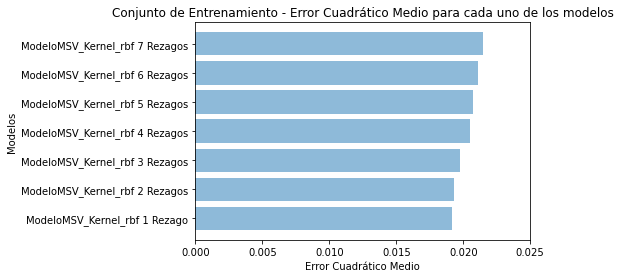

In [47]:
ypos = ['ModeloMSV_Kernel_rbf 1 Rezago','ModeloMSV_Kernel_rbf 2 Rezagos','ModeloMSV_Kernel_rbf 3 Rezagos','ModeloMSV_Kernel_rbf 4 Rezagos',
        'ModeloMSV_Kernel_rbf 5 Rezagos','ModeloMSV_Kernel_rbf 6 Rezagos','ModeloMSV_Kernel_rbf 7 Rezagos']


plt.barh(ypos, EcmTrainSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Error Cuadrático Medio para cada uno de los modelos')
plt.xlabel('Error Cuadrático Medio')
plt.ylabel('Modelos')
plt.xlim(0.0, .025)
plt.show()

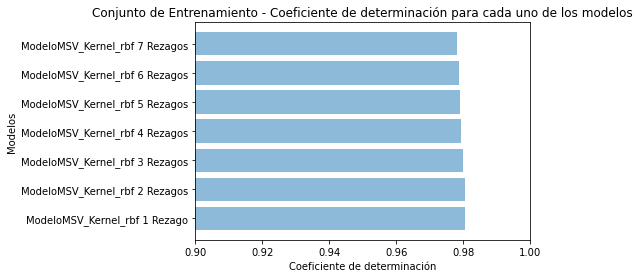

In [48]:
plt.barh(ypos, R2_TrainSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Coeficiente de determinación para cada uno de los modelos')
plt.xlabel('Coeficiente de determinación')
plt.ylabel('Modelos')
plt.xlim(0.9, 1)
plt.show()

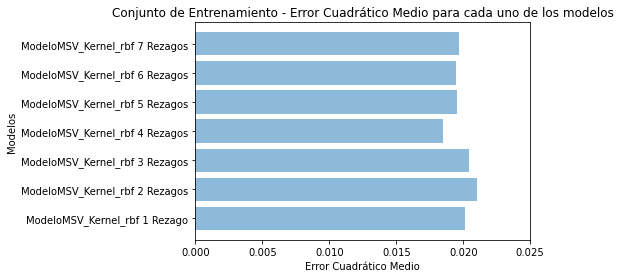

In [49]:
plt.barh(ypos, EcmTestSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Error Cuadrático Medio para cada uno de los modelos')
plt.xlabel('Error Cuadrático Medio')
plt.ylabel('Modelos')
plt.xlim(0.0, .025)
plt.show()

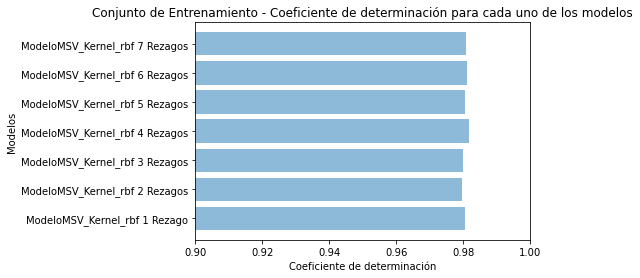

In [50]:
plt.barh(ypos, R2_TestSVR_Krbf, align='center', alpha=0.5)
plt.title('Conjunto de Entrenamiento - Coeficiente de determinación para cada uno de los modelos')
plt.xlabel('Coeficiente de determinación')
plt.ylabel('Modelos')
plt.xlim(0.9, 1)
plt.show()

In [51]:
#Cálculo de predicciones en términos de las unidades originales de las variables

index = R2_TestSVR_Krbf.index(np.max(R2_TestSVR_Krbf))+1

realBitcoinTest = np.exp(sc_y.inverse_transform(y_testStand[index]))
precidccionesBitcoinTest = np.exp(sc_y.inverse_transform(predTestSVR_Krbf[index]))

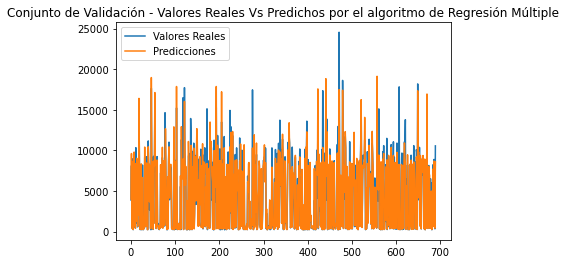

In [52]:
plt.plot(realBitcoinTest, label = "Valores Reales")
plt.plot(precidccionesBitcoinTest, label = "Predicciones")
plt.title("Conjunto de Validación - Valores Reales Vs Predichos por el algoritmo de Regresión Múltiple")
plt.legend()
plt.show()

C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


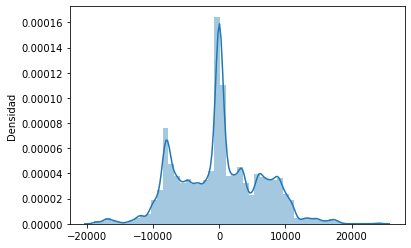

In [53]:
import seaborn as sns

sns.distplot((realBitcoinTest - precidccionesBitcoinTest), bins = 50)
plt.ylabel("Densidad")
plt.show()

Para entrenar el modelo final, se corre el algoritmo seleccionado, en este caso el de SVR con Kernerl rbf, con cuatro (4) rezagos

In [54]:
# Modelo final

# 1.- Extracción de la información correspondiente a las variables y, X
y_final = y_list[3]
X_final = X_list[3]

# 2.- Estandarización de todo el dataframe
y_final = y_final.values
y_final = y_final.reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_final = sc_X.fit_transform(X_final)
y_final = sc_y.fit_transform(y_final)


# Entrenamiento del modelo Final

modeloSVR_Krbf_final = svm.SVR(kernel='rbf', gamma='auto')
modeloSVR_Krbf_final.fit(X_final, y_final)

# Predicciones con los datos de entrenamiento
y_pred_final= modeloSVR_Krbf_final.predict(X_final)

# Cálculo de las medidas de ajuste del algoritmo
ErrorCueadraticoMedioFinal = mean_squared_error(y_final, y_pred_final)
R2_Final = r2_score(y_final, y_pred_final)

print("============================================================================================")
print()
print("El error cuadrático medio para el modelo final es:", round(ErrorCueadraticoMedioFinal,4))
print()
print("El coeficiente de determinación(R2) para el modelo final es:", round(R2_Final,4))
print()
print("============================================================================================")


El error cuadrático medio para el modelo final es: 0.0194

El coeficiente de determinación(R2) para el modelo final es: 0.9806



C:\Users\rmoli\Anaconda3\envs\ITT_BigData\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Las siguientes líneas de código guardan el modelo final entrenado para ser usado posteriormente con nuevos datos y no tener que pasar por todo el proceso 

In [55]:
import joblib

joblib.dump(sc_X, 'estandariza_X.pkl')
joblib.dump(sc_y, 'estandariza_y.pkl')
joblib.dump(modeloSVR_Krbf_final, 'modeloSVR_Krbf_final.pkl')

['modeloSVR_Krbf_final.pkl']

In [56]:
fin = time() 
 
duracion_ejecucion_script = fin - inicio
 
print('El tiempo de ejecucion (en segundos) fue:',duracion_ejecucion_script,'segundos') #En segundos

El tiempo de ejecucion (en segundos) fue: 10.886220693588257 segundos
